In [2]:
# The goal here is to build a large spreadsheet listing:
# LGA_2015 (id for boundary and area information) | council | state | population | councillors | notes
# we will go through state by state

In [3]:
# TASMANIA

# Load data of councillors from Tas, provided by the association there.

import pandas as pd

tas = pd.read_csv('tascouncillors.csv')
tascouncillors = pd.DataFrame(tas.groupby('Council').size()).reset_index()
tascouncillors.columns = ['council','councillors']
tascouncillors['state'] = 'Tasmania'
tascouncillors.head()


,council,councillors,state
0,Break O'Day,9,Tasmania
1,Brighton,9,Tasmania
2,Burnie,9,Tasmania
3,Central Coast,9,Tasmania
4,Central Highlands,9,Tasmania


In [5]:
# Now we will match each of these councils with the 2015 LGA ABS data for population

# Load the population by LGA data downloaded from http://stat.data.abs.gov.au/

abspop = pd.read_csv('ABS_ERP_LGA2015_08112016155122158.csv')
taspop = abspop[(abspop['LGA_2015']>59999)&(abspop['LGA_2015']<70000)]

# check they are the same length
print(len(taspop) == len(tascouncillors))

True


In [6]:
# Match and check

from fuzzywuzzy import process

matches = tascouncillors['council'].apply(lambda x: process.extractOne(x,taspop['Region'].tolist())).apply(pd.Series)
matches.columns = ['Pop match','Score']
tascouncillors = tascouncillors.join(matches).sort_values('Score')
tascouncillors.head()

,council,councillors,state,Pop match,Score
6,City of Clarence,12,Tasmania,Clarence (C),85
12,Flinders Island,7,Tasmania,Flinders (M),85
8,City of Launceston,12,Tasmania,Launceston (C),86
7,City of Hobart,12,Tasmania,Hobart (C),86
15,Glenorchy City Council,10,Tasmania,Glenorchy (C),86


In [7]:
# check unique counts
print(len(tascouncillors['council'].unique()))
print(len(tascouncillors['Pop match'].unique()))

29
29


In [9]:
# Add population and notes

taspop = taspop[['LGA_2015','Region','Value']]
tasc = pd.merge(taspop,tascouncillors,left_on='Region',right_on='Pop match')
tasc = tasc[['LGA_2015','Region','state','Value','councillors']]
tasc.columns = ['LGA_2015','council','state','population','councillors']
tasc['notes'] = ''
tasc.set_value(15,'notes','Council in administration - formally no councillors until 2018')
tasc.head()


,LGA_2015,council,state,population,councillors,notes
0,60210,Break O'Day (M),Tasmania,6469,9,
1,60410,Brighton (M),Tasmania,16010,9,
2,60610,Burnie (C),Tasmania,19887,9,
3,60810,Central Coast (M),Tasmania,22401,9,
4,61010,Central Highlands (M),Tasmania,2309,9,


In [10]:
# Now, let's move onto Northern Territory

ntpop = abspop[(abspop['LGA_2015']>69999)&(abspop['LGA_2015']<79000)]
ntpop = ntpop[['LGA_2015','Region','Value']]
ntpop['State'] = 'Northern Territory'
ntpop.columns = ['LGA_2015','council','population','state']
ntpop = ntpop[['LGA_2015','council','state','population']]

# Number of councillors listed in the NT LGA directory: http://www.lgant.asn.au/publications/local-government-directory
ntpop['councillors'] = [9,13,0,12,6,13,14,7,5,12,7,12,12,5,6,11,6]
ntpop['notes'] = ''
ntpop.set_value(551,'notes','No councillors - under long-term administration.')
ntpop

,LGA_2015,council,state,population,councillors,notes
549,70200,Alice Springs (T),Northern Territory,27972,9,
550,70420,Barkly (R),Northern Territory,8168,13,
551,70540,Belyuen (S),Northern Territory,209,0,No councillors - under long-term administration.
552,70620,Central Desert (R),Northern Territory,4368,12,
553,70700,Coomalie (S),Northern Territory,1296,6,
554,71000,Darwin (C),Northern Territory,82912,13,
555,71300,East Arnhem (R),Northern Territory,10730,14,
556,72200,Katherine (T),Northern Territory,11118,7,
557,72300,Litchfield (M),Northern Territory,23614,5,
558,72330,MacDonnell (R),Northern Territory,6982,12,


In [18]:
# Qld

qldpop = abspop[(abspop['LGA_2015']>29999)&(abspop['LGA_2015']<40000)]

# load results collected from http://results.ecq.qld.gov.au/elections/local/LG2016/groupIndex.html

qldcounts = pd.read_csv('qldpop.csv',encoding='latin1')
qldcounts = qldcounts[['LGA_2015','Councillors (non mayor)']]
qldcounts.head()

qldmerge = pd.merge(qldpop,qldcounts)
qldmerge['councillors'] = qldmerge['Councillors (non mayor)'] + 1 
qldmerge = qldmerge[['LGA_2015','Region','Value','councillors']]

qldmerge.columns = ['LGA_2015','council','population','councillors']
qldmerge['state'] = 'Queensland'
qldmerge['notes'] = ''
qldmerge.set_value(71,'notes','Jointly administered by Rio Tinto.')
qldfinal = qldmerge
qldfinal.head()

,LGA_2015,council,population,councillors,state,notes
0,30250,Aurukun (S),1424,5,Queensland,
1,30300,Balonne (S),4826,7,Queensland,
2,30370,Banana (S),15209,7,Queensland,
3,30410,Barcaldine (R),3342,7,Queensland,
4,30450,Barcoo (S),357,5,Queensland,


In [14]:
# WA - data scraped from WALGA local government directory: http://walga.asn.au/About-Local-Government/LG-Directory.aspx
wapop = abspop[(abspop['LGA_2015']>49999)&(abspop['LGA_2015']<60000)]

# Narrogin Town and Narrogin Shire merged in 2016 and the directory is not updated (there are now 9 councillors there).
# We will keep the geography of Narrogin Shire, ignore Narrogin Town, and update the population of the Shire so it includes both.
# Wyndham-East Kimberley has recently been taken over by a Commissioner but usually has 9 councillors.
# These have been manually edited in the spreadsheet.

wapop = wapop[wapop['LGA_2015']!=56520]
wapop.set_value(473,'Value',5358)

wacounts = pd.read_csv('wacouncillors.csv',header=None)
wacounts.columns = ['Council','Councillors']

In [15]:
# Compare sizes of wapop and wacounts - wacounts includes Christmas and Cocos Islands, but we will ignore these
print(len(wapop),len(wacounts))

137 139


In [16]:
# There are some external territories in the directory file, but because we don't care about the islands, 
# we will run a match for each in the wapop DataFrame 

from fuzzywuzzy import process

matches = wapop['Region'].apply(lambda x: process.extractOne(x,wacounts['Council'].tolist())).apply(pd.Series)
matches.columns = ['Count match','Score']
wacouncillors = wapop.join(matches).sort_values('Score')
wacouncillors[['Region','Count match','Score']]

# Check uniques

print(len(wacouncillors['Region'].unique()))
print(len(wacouncillors['Count match'].unique()))

137
137


In [17]:
# Now let's merge back in the counts
wafinal = pd.merge(wacouncillors,wacounts,left_on='Count match',right_on='Council')
wafinal = wafinal[['LGA_2015','Region','Value','Councillors']]
wafinal['state'] = 'Western Australia'
wafinal.columns = ['LGA_2015','council','population','councillors','state']
wafinal['notes'] = ''

wafinal.sort_values('councillors').head()

,LGA_2015,council,population,councillors,state,notes
48,57630,Sandstone (S),105,5,Western Australia,
33,59350,Yalgoo (S),402,5,Western Australia,
54,56860,Nungarin (S),218,6,Western Australia,
103,59320,Woodanilling (S),422,6,Western Australia,
92,53360,Exmouth (S),2591,6,Western Australia,


In [19]:
# SA - received counts from LG association. 
# Needed to add Roxby Downs, Anangu Pitjantjatjara and Maralinga Tjarutja manually.
# All are permanently in administration, so councillor count is 0.

sapop = abspop[(abspop['LGA_2015']>39999)&(abspop['LGA_2015']<49000)]
sacounts = pd.read_csv('sacounts.csv')

# comparing lengths...
print(len(sapop),len(sacounts))

70 70


In [21]:
# Running the merge

matches = sapop['Region'].apply(lambda x: process.extractOne(x,sacounts['Council'].tolist())).apply(pd.Series)
matches.columns = ['Count match','Score']
sacouncillors = sapop.join(matches).sort_values('Score')
sacouncillors[['Region','Count match','Score']].head()

,Region,Count match,Score
349,Naracoorte and Lucindale (DC),Naracoorte Lucindale Council,81
322,Clare and Gilbert Valleys (DC),Clare & Gilbert Valleys Council,82
313,Alexandrina (DC),Alexandrina Council,84
355,Playford (C),City of Playford,85
375,Wattle Range (DC),Wattle Range Council,85


In [22]:
# Testing uniques
print(len(sacouncillors['Region'].unique()))
print(len(sacouncillors['Count match'].unique()))

70
61


In [24]:
# We have a few duplicates, so we will manually match some of these
probdf = pd.Series(sacouncillors.groupby('Count match').size().sort_values(ascending=False))
probs = probdf[probdf>1].index.tolist()

In [25]:
# Let's see what we're working with
sacouncillors[sacouncillors['Count match'].isin(probs)][['Region','Count match']]

,Region,Count match
318,Burnside (C),City of Burnside
359,Port Pirie City and Dists (M),City of Burnside
345,Mount Barker (DC),District Council of Mount Barker
348,Murray Bridge (RC),District Council of Karoonda East Murray
347,Mount Remarkable (DC),District Council of Mount Barker
343,Mid Murray (DC),District Council of Karoonda East Murray
370,Tumby Bay (DC),City of Holdfast Bay
380,Yorke Peninsula (DC),District Council of Lower Eyre Peninsula
317,Berri and Barmera (DC),"City of Norwood, Payneham and St Peters"
334,Karoonda East Murray (DC),District Council of Karoonda East Murray


In [26]:
# Make the necessary changes based on the values in the sacounts spreadsheet
sacouncillors.set_value(359,'Count match','Port Pirie Regional Council')
sacouncillors.set_value(348,'Count match','The Rural City of Murray Bridge')
sacouncillors.set_value(347,'Count match','District Council of Mount Remarkable')
sacouncillors.set_value(343,'Count match','Mid Murray Council')
sacouncillors.set_value(370,'Count match','District Council of Tumby Bay')
sacouncillors.set_value(380,'Count match','Yorke Peninsula Council')
sacouncillors.set_value(317,'Count match','Berri Barmera Council')
sacouncillors.set_value(312,'Count match','Adelaide Hills Council')
sacouncillors.set_value(356,'Count match','City of Port Adelaide Enfield')

# And run the unique check
print(len(sacouncillors['Region'].unique()))
print(len(sacouncillors['Count match'].unique()))


70
70


In [28]:
# Complete the merge

safinal = pd.merge(sacouncillors,sacounts,left_on='Count match',right_on='Council')
safinal = safinal[['LGA_2015','Region','Value','Councillors']]
safinal['state'] = 'South Australia'
safinal.columns = ['LGA_2015','council','population','councillors','state']
safinal['notes'] = ''
safinal.head()


,LGA_2015,council,population,councillors,state,notes
0,45090,Naracoorte and Lucindale (DC),8390,11,South Australia,
1,41140,Clare and Gilbert Valleys (DC),9057,10,South Australia,
2,40220,Alexandrina (DC),25449,12,South Australia,
3,45680,Playford (C),88222,16,South Australia,
4,48340,Wattle Range (DC),11460,12,South Australia,


In [30]:
# NSW - excluding current or pending mergers

nswpop = abspop[(abspop['LGA_2015']>1)&(abspop['LGA_2015']<19000)]

# Here is the info from the local government register - https://www.olg.nsw.gov.au/local-government-directory
# Note Berrigan and Parramatta councils didn't have councillors listed, I added Berrigan (8) on the spreadsheet.
# Parramatta is stuck in mergers.

nswdf = pd.read_csv('nswreg.csv')
nswdf = nswdf[nswdf['1']=='COUNCIL']
nswdf.sort_values('4').tail()


,Unnamed: 0,0,1,2,3,4
31,31,Central Darling Shire Council,COUNCIL,312.3,154538.0,15.0
152,152,Upper Hunter Shire Council,COUNCIL,36.3,142310.0,15.0
146,146,Council of The City Of Sydney,COUNCIL,404.8,190428.0,15.0
144,144,Sutherland Shire Council,COUNCIL,61.4,184622.0,15.0
110,110,"Parramatta Council, City of",COUNCIL,0.0,NaN,NaN


In [31]:
nswgeo = pd.read_csv('nswcsvfromgeojson.csv')
nswgeo.head()

,cartodb_id,wards,link_name,status,lga_name
0,91,N,edward-river-council,Commenced,Edward River Council
1,86,Y,central-coast-council,Commenced,Central Coast Council
2,68,NaN,NaN,No Change,Inverell Shire Council
3,72,NaN,NaN,No Change,Wagga Wagga City Council
4,75,NaN,NaN,No Change,Coonamble Shire Council


In [33]:
nswgeo.groupby('status').size()

status
Boundary alteration     1
Commenced              20
No Change              80
Pending                12
dtype: int64

In [34]:
# the plan is just to get the NSW councils that haven't changed
nswnochange = nswgeo[nswgeo['status']=='No Change']

In [35]:
# merge with nswpop

matches = nswnochange['lga_name'].apply(lambda x: process.extractOne(x,nswpop['Region'].tolist())).apply(pd.Series)
matches.columns = ['Pop match','Score']
nswcouncillors = nswnochange.join(matches).sort_values('Score',ascending=False)
nswcouncillors


,cartodb_id,wards,link_name,status,lga_name,Pop match,Score
14,39,NaN,NaN,No Change,Port Macquarie-Hastings Council,Port Macquarie-Hastings (A),91
36,16,NaN,NaN,No Change,Warrumbungle Shire Council,Warrumbungle Shire (A),90
31,15,NaN,NaN,No Change,Mid-Western Regional Council,Mid-Western Regional (A),90
78,30,NaN,NaN,No Change,Upper Lachlan Shire Council,Upper Lachlan Shire (A),90
7,78,NaN,NaN,No Change,Upper Hunter Shire Council,Upper Hunter Shire (A),90
43,69,NaN,NaN,No Change,Greater Hume Shire Council,Greater Hume Shire (A),90
49,57,NaN,NaN,No Change,Tamworth Regional Council,Tamworth Regional (A),89
79,31,NaN,NaN,No Change,Goulburn Mulwaree Council,Goulburn Mulwaree (A),89
46,54,NaN,NaN,No Change,Richmond Valley Council,Richmond Valley (A),89
98,25,NaN,NaN,No Change,Sutherland Shire Council,Sutherland Shire (A),89


In [36]:
# Fixing up bad merges...

nswcouncillors.set_value(71,'Pop match','Sydney (C)')
nswcouncillors.set_value(74,'Pop match','Wollondilly (A)')
nswcouncillors.set_value(65,'Pop match','Narromine (A)')
nswcouncillors.set_value(103,'Pop match','Narrandera (A)')
nswcouncillors.set_value(55,'Pop match','Moree Plains (A)')
nswcouncillors.set_value(58,'Pop match','Eurobodalla (A)')
nswcouncillors.set_value(18,'Pop match','Wentworth (A)')
nswcouncillors.set_value(23,'Pop match','Walgett (A)')
nswcouncillors.set_value(19,'Pop match','Gilgandra (A)')
nswcouncillors.set_value(17,'Pop match','Tenterfield (A)')
nswcouncillors.set_value(6,'Pop match','Muswellbrook (A)')
nswcouncillors.set_value(42,'Pop match','Singleton (A)')
nswcouncillors.set_value(48,'Pop match','Liverpool Plains (A)')
nswcouncillors.set_value(41,'Pop match','Glen Innes Severn (A)')
nswcouncillors.set_value(40,'Pop match','Wingecarribee (A)')

# Test uniques
print(len(nswcouncillors['lga_name'].unique()))
print(len(nswcouncillors['Pop match'].unique()))


80
80


In [37]:
# Merge with nswdf

nswmerge = pd.merge(nswcouncillors,nswdf,left_on='lga_name',right_on='0',how='outer').sort_values('0',ascending=False)
nswmerge = nswmerge[nswmerge['lga_name'].notnull()]
nswmerge.head()

,cartodb_id,wards,link_name,status,lga_name,Pop match,Score,Unnamed: 0,0,1,2,3,4
11,8.0,NaN,NaN,No Change,Yass Valley Council,Yass Valley (A),87.0,171,Yass Valley Council,COUNCIL,8101.9,14650.0,9.0
17,64.0,NaN,NaN,No Change,Wollondilly Shire Council,Wollondilly (A),86.0,168,Wollondilly Shire Council,COUNCIL,4391.8,3521.0,8.0
73,20.0,NaN,NaN,No Change,Wingecarribee Shire Council,Wingecarribee (A),86.0,167,Wingecarribee Shire Council,COUNCIL,7332.1,6973.0,10.0
46,43.0,NaN,NaN,No Change,Wentworth Shire Council,Wentworth (A),86.0,163,Wentworth Shire Council,COUNCIL,26.7,191918.0,10.0
63,29.0,NaN,NaN,No Change,Weddin Shire Council,Weddin (A),86.0,162,Weddin Shire Council,COUNCIL,333.6,223192.0,15.0


In [113]:
# finalise dataset using nswcouncillors as a template

nswfinal = nswpop[nswpop['Region'].isin(nswcouncillors['Pop match'].tolist())]
nswfinal = nswfinal[['LGA_2015','Region','Value']]
nswfinal = pd.merge(nswfinal,nswmerge,left_on='Region',right_on='Pop match')
nswfinal = nswfinal[['LGA_2015','Region','Value','4']]
nswfinal.columns = ['LGA_2015','council','population','councillors']
nswfinal['state'] = 'New South Wales'
nswfinal['notes'] = ''
nswfinal.head()


,LGA_2015,council,population,councillors,state,notes
0,10050,Albury (C),51722,9.0,New South Wales,
1,10250,Ballina (A),41828,12.0,New South Wales,
2,10300,Balranald (A),2422,10.0,New South Wales,
3,10550,Bega Valley (A),33475,8.0,New South Wales,
4,10600,Bellingen (A),13010,12.0,New South Wales,


In [87]:
# Vic - counts provided by LGA
# Had to add back in Geelong which is currently in administration. It previously had 13 councillors.

vicpop = abspop[(abspop['LGA_2015']>19999)&(abspop['LGA_2015']<29000)]

viccounts = pd.read_csv('viccounts.csv')

print(len(vicpop),len(viccounts))

79 79


In [88]:
# looks like the ABS data has one extra LGA.

matches = vicpop['Region'].apply(lambda x: process.extractOne(x,viccounts['council'].tolist())).apply(pd.Series)
matches.columns = ['Count match','Score']
viccouncillors = vicpop.join(matches).sort_values('Score',ascending=False)

print(len(viccouncillors['Count match'].unique()))

74


In [89]:
# Looks like we are missing four of the counted councils
# We have a few duplicates, so we will manually match some of these
probdf = pd.Series(viccouncillors.groupby('Count match').size().sort_values(ascending=False))
probs = probdf[probdf>1].index.tolist()
probs

['East Gippsland Shire Council',
 'Macedon Ranges Shire Council',
 'Bass Coast Shire Council',
 'Northern Grampians Shire Council',
 'Greater Bendigo City Council']

In [90]:
# Let's see what we're working with
viccouncillors[viccouncillors['Count match'].isin(probs)][['Region','Count match']]

,Region,Count match
210,Northern Grampians (S),Northern Grampians Shire Council
230,Yarra Ranges (S),Macedon Ranges Shire Council
218,Surf Coast (S),Bass Coast Shire Council
215,Southern Grampians (S),Northern Grampians Shire Council
214,South Gippsland (S),East Gippsland Shire Council
191,Macedon Ranges (S),Macedon Ranges Shire Council
157,Bass Coast (S),Bass Coast Shire Council
171,East Gippsland (S),East Gippsland Shire Council
179,Greater Geelong (C),Greater Bendigo City Council
177,Greater Bendigo (C),Greater Bendigo City Council


In [92]:
# Make the necessary changes based on the values in the sacounts spreadsheet.
viccouncillors.set_value(230,'Count match','Yarra Ranges Shire Council')
viccouncillors.set_value(218,'Count match','Surf Coast Shire Council')
viccouncillors.set_value(215,'Count match','Southern Grampians Shire Council')
viccouncillors.set_value(214,'Count match','South Gippsland Shire Council')
viccouncillors.set_value(179,'Count match','Greater Geelong City Council')

# And run the unique check
print(len(viccouncillors['Region'].unique()))
print(len(viccouncillors['Count match'].unique()))

79
79


In [93]:
# complete the merge
vicfinal = pd.merge(viccouncillors,viccounts,left_on='Count match',right_on='council')
vicfinal = vicfinal[['LGA_2015','Region','Value','councillors']]
vicfinal['state'] = 'Victoria'
vicfinal.columns = ['LGA_2015','council','population','councillors','state']
vicfinal['notes'] = ''
vicfinal.head()

,LGA_2015,council,population,councillors,state,notes
0,25340,Mornington Peninsula (S),155015,11,Victoria,
1,22830,Greater Shepparton (C),63366,9,Victoria,
2,20110,Alpine (S),11858,7,Victoria,
3,25150,Moorabool (S),31496,7,Victoria,
4,25710,Nillumbik (S),62602,7,Victoria,


In [114]:
# combine them all...

combo = pd.DataFrame([])
combo = combo.append(ntpop).append(tasc).append(qldmerge).append(wafinal).append(safinal).append(nswfinal).append(vicfinal)
combo.head()

,LGA_2015,council,councillors,notes,population,state
549,70200,Alice Springs (T),9.0,,27972,Northern Territory
550,70420,Barkly (R),13.0,,8168,Northern Territory
551,70540,Belyuen (S),0.0,No councillors - under long-term administration.,209,Northern Territory
552,70620,Central Desert (R),12.0,,4368,Northern Territory
553,70700,Coomalie (S),6.0,,1296,Northern Territory


In [124]:
# add area data 

areas = pd.read_csv('lgageo.csv')
areas = areas[['LGA_CODE15','AREA_SQKM']]
areas.columns = ['LGA_2015','area']
final = pd.merge(combo,areas)
final.head()

,LGA_2015,council,councillors,notes,population,state,cpp,area
0,70200,Alice Springs (T),9.0,,27972,Northern Territory,3108.000000,327.5099
1,70420,Barkly (R),13.0,,8168,Northern Territory,628.307692,322788.8427
2,70540,Belyuen (S),0.0,No councillors - under long-term administration.,209,Northern Territory,inf,41.4055
3,70620,Central Desert (R),12.0,,4368,Northern Territory,364.000000,281311.3821
4,70700,Coomalie (S),6.0,,1296,Northern Territory,216.000000,2057.3443


Populating the interactive namespace from numpy and matplotlib


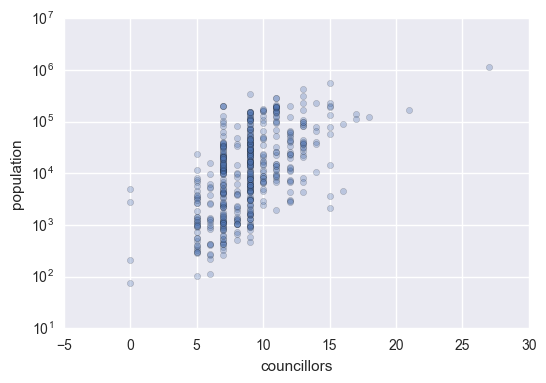

In [125]:
%pylab inline
import seaborn
final.plot(kind='scatter',x='councillors',y='population',alpha=0.3,logy=True)

In [127]:
final.sort_values('area')

,LGA_2015,council,councillors,notes,population,state,cpp,area
250,56930,Peppermint Grove (S),7.0,,1646,Western Australia,2.351429e+02,1.0676
248,53150,East Fremantle (T),9.0,,7743,Western Australia,8.603333e+02,3.1386
287,48260,Walkerville (M),9.0,,7673,South Australia,8.525556e+02,3.5298
190,52170,Cottesloe (T),9.0,,8602,Western Australia,9.557778e+02,3.8562
235,55740,Mosman Park (T),6.0,,9547,Western Australia,1.591167e+03,4.3474
198,51750,Claremont (T),10.0,,10706,Western Australia,1.070600e+03,4.9556
14,74560,Wagait (S),6.0,,427,Northern Territory,7.116667e+01,5.6348
170,57980,Subiaco (C),13.0,,20423,Western Australia,1.571000e+03,6.9761
267,46510,Prospect (C),9.0,,21416,South Australia,2.379556e+03,7.7918
441,26080,Queenscliffe (B),5.0,,3017,Victoria,6.034000e+02,8.6183


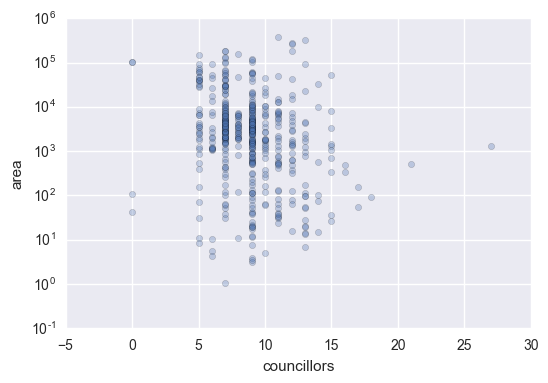

In [126]:
final.plot(kind='scatter',x='councillors',y='area',alpha=0.3,logy=True)

In [128]:
final.to_csv('local.csv')

In [129]:
# Merge back into the ABS LGA file to see how many councils are missing.

check = pd.merge(abspop[['LGA_2015','Region']],combo,how='outer')

In [117]:
# How many NSW council areas are missing?
len(check[check['council'].isnull()].query('LGA_2015 > 10000 & LGA_2015 < 19999'))

73

In [118]:
# How many NSW council areas have we included
len(nswfinal)

80